In [1]:
''' INFRAÇOES DE TRANSITO DF - ABRIL/2020 '''
'''http://www.dados.gov.br/dataset/infracoes-transito/resource/3b8aee2a-2615-4de9-8706-c89322e67c2a'''
'''http://www.dados.gov.br/dataset/infracoes-transito'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_infracoes_abril = pd.read_csv('infracoes_abril.csv', sep=';', low_memory=False)
df_infracoes_abril_2019 = pd.read_csv('infracoes_abril2019.csv', sep=';', low_memory=False)



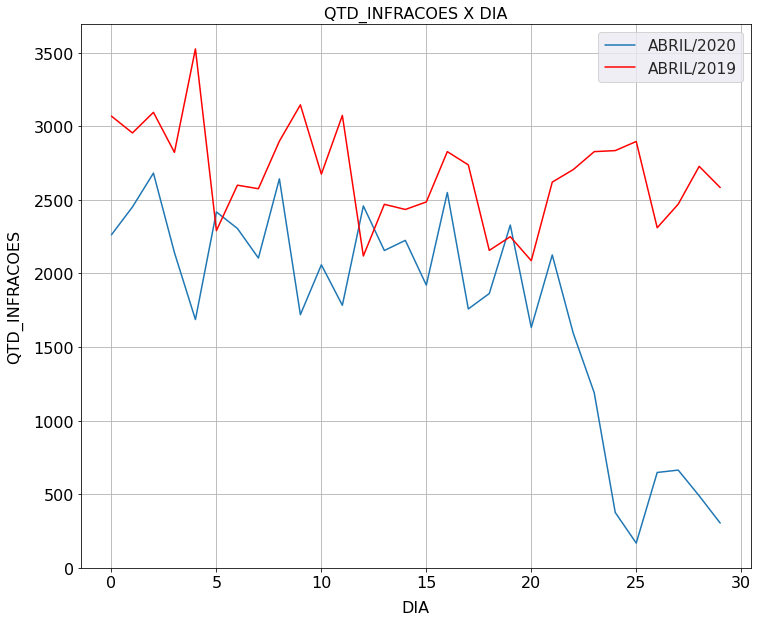

In [3]:
# gráfico de linha qtd de multas por periodo
# comparando 2019/2020
ax =plt.gca()
sns.set(font_scale=1.4)
df_multa_periodo_abril = df_infracoes_abril.groupby('cometimento', as_index=False)['tipo_infracao'].count()
df_multa_periodo_abril2019 = df_infracoes_abril_2019.groupby('cometimento', as_index=False)['tipo_infracao'].count()
df_multa_periodo_abril.plot(ax=ax, label='ABRIL/2020', figsize=(12, 10),  y='tipo_infracao', fontsize=16, kind='line')
df_multa_periodo_abril2019.plot(ax=ax, label='ABRIL/2019', figsize=(12, 10),  y='tipo_infracao', fontsize=16, color='red', kind='line')
plt.title("QTD_INFRACOES X DIA", fontsize=16)
plt.ylabel('QTD_INFRACOES', labelpad=10, fontsize=16)
plt.xlabel('DIA', labelpad=10, fontsize=16)
plt.show()


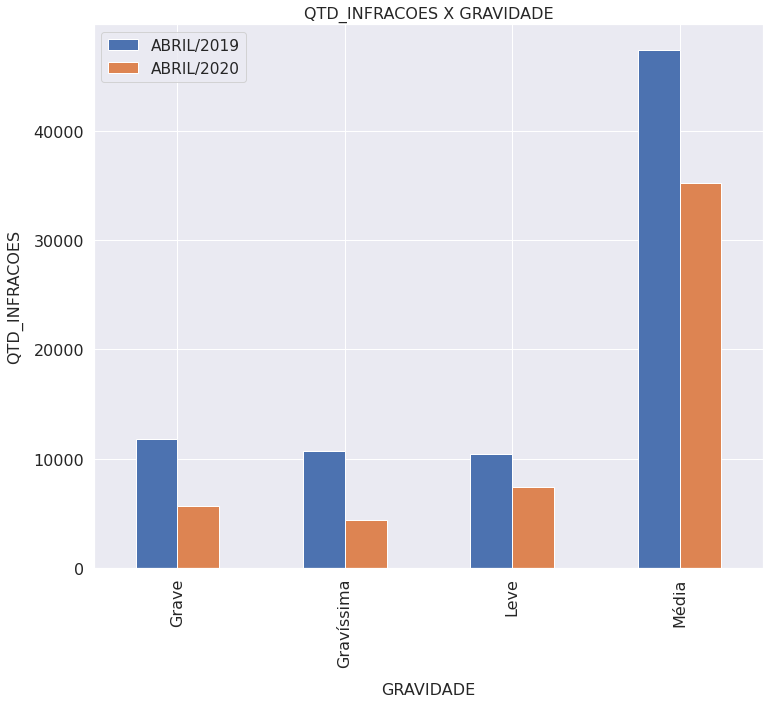

In [4]:
#grafico de barras, qtd de infracos por tipo_gravidade

ax = plt.gca()
sns.set(font_scale=1.4)
df_multa_gravidade_abril = df_infracoes_abril.groupby('grav_tipo', as_index=False)['tipo_infracao'].count()
df_multa_gravidade_abril2019 = df_infracoes_abril_2019.groupby('grav_tipo', as_index=False)['tipo_infracao'].count()

df_multa_gravidade = pd.DataFrame({
    "ABRIL/2019": df_multa_gravidade_abril2019['tipo_infracao'].to_list(),
    "ABRIL/2020": df_multa_gravidade_abril['tipo_infracao'].to_list()
}, index=df_multa_gravidade_abril['grav_tipo'].to_list())

df_multa_gravidade.plot(ax=ax, kind="bar", fontsize=16, figsize=(12, 10))
plt.title("QTD_INFRACOES X GRAVIDADE", fontsize=16)
plt.ylabel('QTD_INFRACOES', labelpad=10, fontsize=16)
plt.xlabel('GRAVIDADE', labelpad=15, fontsize=16)
plt.show()

In [5]:
#treemap por tipo de infracao
df_infracoes_abril_tp_infracao = df_infracoes_abril.groupby(['tipo_infracao', 'descricao'],  as_index=False).count()
df_infracoes_abril_tp_infracao['all'] = 'all'
fig = px.treemap( df_infracoes_abril_tp_infracao, path=[df_infracoes_abril_tp_infracao['descricao'].to_list()], values=df_infracoes_abril_tp_infracao['grav_tipo'].to_list())
fig.show()